#  2.1 AutoML con Pycaret
### Clasificacion del uso de la tarjeta de crédito

In [1]:
#!pip install pycaret

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

from pycaret.regression import *

# Obtención de los datos

In [3]:
df = pd.read_csv("../data/house-prices-train.csv")
print("Filas dataset:", len(df))
df.head()

Filas dataset: 1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#train_df = df.sample(frac=0.8, random_state=0)
#test_df = df.drop(train_df.index)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

train_df.reset_index(inplace=True, drop=True)
test_df.reset_index(inplace=True, drop=True)

print("Filas train:", len(train_df))
print("Filas valid:", len(test_df))

Filas train: 1168
Filas valid: 292


# Preprocesamiento de los datos

In [5]:
experiment = setup(data   = train_df, target = 'SalePrice') 

,Description,Value
0,session_id,2035
1,Target,SalePrice
2,Original Data,"(1168, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(817, 384)"


# Comparación de modelos
### Y seccionea los 10 mejores

In [6]:
%%time
#best_model = compare_models(n_select = 1)
top10 = compare_models(n_select = 10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,16149.1720,948060717.6798,29070.7236,0.8377,0.1310,0.0920,1.4900
lightgbm,Light Gradient Boosting Machine,17706.9497,1012955894.5356,30770.7718,0.8204,0.1488,0.1043,0.0370
omp,Orthogonal Matching Pursuit,17350.2673,974081313.6557,29219.9309,0.8162,0.1484,0.1041,0.0220
ridge,Ridge Regression,17845.9457,997585993.6000,30049.8125,0.8139,0.1659,0.1064,0.0250
gbr,Gradient Boosting Regressor,17548.7121,1074316830.3429,31226.3243,0.8094,0.1420,0.1010,0.1260
rf,Random Forest Regressor,19295.6581,1178364317.9011,33264.1063,0.7984,0.1624,0.1147,0.3420
lasso,Lasso Regression,19260.9260,1115865251.2000,31533.2881,0.7913,0.1742,0.1166,0.0310
xgboost,Extreme Gradient Boosting,19278.6514,1201036166.4000,33330.3527,0.7902,0.1573,0.1119,0.2960
en,Elastic Net,19880.5896,1164199782.4000,32922.4348,0.7866,0.1576,0.1154,0.0320
lr,Linear Regression,20552.9932,1219154156.8000,33417.5816,0.7705,0.1842,0.1251,0.1100


CPU times: user 12.3 s, sys: 999 ms, total: 13.3 s
Wall time: 44.6 s


# Optimización de hiperparámateros de los 10 mejores

In [7]:
# tune top 10 base models
# tuned_top10 = [tune_model(model) for model in top10]

# Ensemble

In [15]:
# bagged_top10 = [ensemble_model(i) for i in top10] # tuned_top10

In [16]:
# blender = blend_models(estimator_list = top10) 

In [17]:
#stacking = stack_models(estimator_list = top10, meta_model     = create_model('xgboost'))

# Ver modelos disponibles para entrenar en PyCaret

In [18]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### Decision Tree

In [19]:
#dt = create_model('dt')

### K Nearest Neighbors

In [20]:
#knn = create_model('knn')

### Random Forest

In [21]:
#rf = create_model('rf')

# Optimización del modelo

### 9.1 Decision Tree Classifier

In [22]:
#tuned_dt = tune_model(dt)

### 9.2 K Neighbors Classifier

In [23]:
#import numpy as np
#tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

### Random Forest Classifier

In [24]:
#tuned_rf = tune_model(rf)

# Visualización de los resultados del modelo

In [25]:
my_model = top10[0]
my_model

### Predicted vs Actual plot

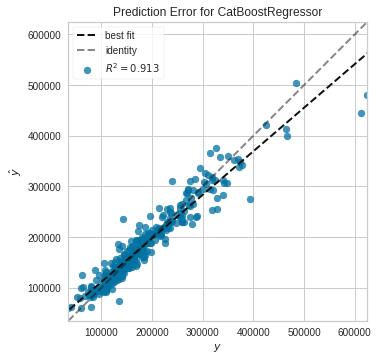

In [26]:
plot_model(my_model, plot = 'error')

### Residuals Plot

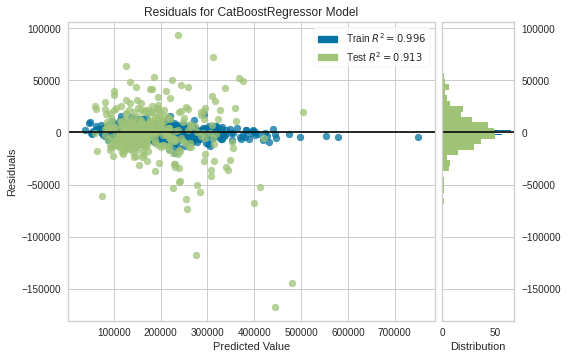

In [27]:
plot_model(my_model, plot='residuals')

### Variables importantes

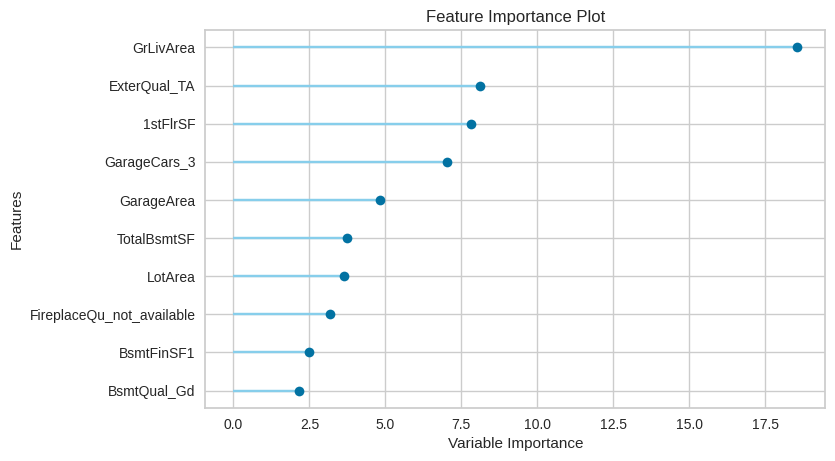

In [28]:
plot_model(my_model, plot='feature')

In [29]:
#evaluate_model(my_model)

# Predicción (holdout set)

In [30]:
predict_model(my_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,15508.0182,590962966.8290,24309.7299,0.9133,0.1329,0.0938


# Predicción (test set)
### MAE= 16693

In [32]:
tmp_df = predict_model(my_model, data=test_df)

y_true = tmp_df["SalePrice"].values
y_pred = tmp_df["Label"].values

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

16693.491113525135

# Finalización del modelo (entrenarlo con todos los datos)

In [33]:
%%time
final_model = finalize_model(my_model)
print(final_model)

CPU times: user 6.17 s, sys: 229 ms, total: 6.39 s
Wall time: 20 s


# Predicción (test set)
### MAE = 16251

In [34]:
preds_test_df = predict_model(final_model, data=test_df)
preds_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Label
0,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624,280719.192060
1,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,8,2006,WD,Normal,133000,143754.280636
2,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,110000,112612.747826
3,280,60,RL,83.0,10005,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2008,WD,Normal,192000,196701.882969
4,656,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,WD,Family,88000,94660.292013


In [35]:
y_true = preds_test_df["SalePrice"].values
y_pred = preds_test_df["Label"].values

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

16251.950668087564

# Guardar el modelo

In [29]:
save_model(final_model, 'Final Model PyCaret - Houses dataset')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='income',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='income')),
                 ('fix_perfect', Remove_100(target='income')),
                 ('clean_names', 

# Cargar el modelo guardado

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [30]:
saved_final_model = load_model('Final Model PyCaret - Houses dataset')

Transformation Pipeline and Model Successfully Loaded


In [31]:
new_prediction = predict_model(saved_final_model, data=test_df)

In [32]:
new_prediction.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Label,Score
0,36,Private,65624,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K,0.8896
1,57,Self-emp-inc,37345,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,36,United-States,>50K,>50K,0.8856
2,49,Private,287647,Masters,14,Divorced,Sales,Not-in-family,White,Male,4787,0,45,United-States,>50K,>50K,0.9082
3,54,Self-emp-not-inc,183668,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,55,United-States,<=50K,<=50K,0.8418
4,17,Self-emp-not-inc,228786,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,24,United-States,<=50K,<=50K,0.9996
